<a href="https://colab.research.google.com/github/francotestori/aauba_01/blob/master/exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje Automático
## Trabajo Práctico 1

El objetivo de este trabajo práctico es el desarrollo de una solución que permita predecir la cancelación de una reserva utilizando como dataset el archivo provisto por la catedra ***'hotel_bookins.csv'***.

In [1]:
# Cargar el archivo original de bookings
!wget https://raw.githubusercontent.com/francotestori/aauba_01/master/resources/hotel_bookings.csv

--2020-05-26 16:53:00--  https://raw.githubusercontent.com/francotestori/aauba_01/master/resources/hotel_bookings.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16855599 (16M) [text/plain]
Saving to: ‘hotel_bookings.csv’

hotel_bookings.csv  100%[===================>]  16.07M  26.5MB/s    in 0.6s    

2020-05-26 16:53:01 (26.5 MB/s) - ‘hotel_bookings.csv’ saved [16855599/16855599]



In [0]:
# Utilizar pandas para hacer la carga del dataframe de bookings
import pandas as pd

pd.set_option('display.max_columns', 35)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 10000)

bookings_df = pd.read_csv('hotel_bookings.csv')

## a. Descripción de los atributos

---

### a.i. Campos categóricos
Pertenecen a este grupo los campos numéricos o no cuyos valores representen categorías en las que la reserva de hoteles se asignará, siempre y cuando estas categorías no puedan ordenarse en forma inmediata. Pertenecen a este grupo los campos que pueden tomar valores 0 y 1, entre otros. Se agregan también el campo AÑO y el campo MES, para que no tomen valores numéricos.

In [4]:
columnas_categoricas = [
  'hotel', 
  'is_canceled', 
  'meal', 
  'country', 
  'market_segment', 
  'distribution_channel', 
  'is_repeated_guest', 
  'deposit_type', 
  'agent', 
  'company', 
  'customer_type', 
  'reservation_status', 
  'arrival_date_month', 
  'arrival_date_year'
]
df_categoricas = bookings_df[columnas_categoricas]
df_categoricas

,hotel,is_canceled,meal,country,market_segment,distribution_channel,is_repeated_guest,deposit_type,agent,company,customer_type,reservation_status,arrival_date_month,arrival_date_year
0,Resort Hotel,0,BB,PRT,Direct,Direct,0,No Deposit,NaN,NaN,Transient,Check-Out,July,2015
1,Resort Hotel,0,BB,PRT,Direct,Direct,0,No Deposit,NaN,NaN,Transient,Check-Out,July,2015
2,Resort Hotel,0,BB,GBR,Direct,Direct,0,No Deposit,NaN,NaN,Transient,Check-Out,July,2015
3,Resort Hotel,0,BB,GBR,Corporate,Corporate,0,No Deposit,304.0,NaN,Transient,Check-Out,July,2015
4,Resort Hotel,0,BB,GBR,Online TA,TA/TO,0,No Deposit,240.0,NaN,Transient,Check-Out,July,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,BB,BEL,Offline TA/TO,TA/TO,0,No Deposit,394.0,NaN,Transient,Check-Out,August,2017
119386,City Hotel,0,BB,FRA,Online TA,TA/TO,0,No Deposit,9.0,NaN,Transient,Check-Out,August,2017
119387,City Hotel,0,BB,DEU,Online TA,TA/TO,0,No Deposit,9.0,NaN,Transient,Check-Out,August,2017
119388,City Hotel,0,BB,GBR,Online TA,TA/TO,0,No Deposit,89.0,NaN,Transient,Check-Out,August,2017


Campos:

*   **hotel**: tipo de hotel (si es Resort o es City)
*   **is_cancelled**: variable que toma 1 cuando la reserva fue cancelada
*   **meal**: tipo de reserva elegida. FB (Full Board), HB (Half Board), SC (self-catering), BB (Bed & Breakfast). Esta variable toma valores indefinidos.
*   **country**: siglas del país de origen de quienes reservan.
*   **market_segment**: segmento de mercado.
*   **distribution_channel**: canal de distribución.
*   **is_repeated_guest**: variable que toma uno cuando se trata de una reserva repetida.
*   **deposit_type**: tipo de depósito, según su condición de reembolsable o no.
*   **agent**: código del agente responsable de la reserva.
*   **company**: código de la empresa responsable de la reserva.
*   **customer_type**: tipo de consumidor.
*   **customer_type**: estado actual de la reserva.
*   **arrival_date_year**: año de arribo al hotel.
*   **arrival_date_month**: mes de arribo al hotel.


In [0]:
pd.set_option('display.max_rows', 1000)

for i in range(len(df_categoricas.columns)):
  print(df_categoricas[df_categoricas.columns[i]].value_counts())


### a.ii. Campos numéricos
Pertenecen a este grupo los campos numéricos continuos, cuyo valor represente una magnitud y no una categoría. En los casos 

In [6]:
columnas_numericas = [
'lead_time', 
'arrival_date_week_number', 
'arrival_date_day_of_month', 
'stays_in_weekend_nights', 
'stays_in_weekend_nights', 
'adults', 'children', 
'babies', 
'previous_cancellations', 
'previous_bookings_not_canceled', 
'booking_changes', 
'days_in_waiting_list', 
'adr', 
'required_car_parking_spaces', 
'total_of_special_requests'                      
]
df_numericas = bookings_df[columnas_numericas]
df_numericas

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekend_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,3,0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,4,0,0.00,0,0
2,7,27,1,0,0,1,0.0,0,0,0,0,0,75.00,0,0
3,13,27,1,0,0,1,0.0,0,0,0,0,0,75.00,0,0
4,14,27,1,0,0,2,0.0,0,0,0,0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,2,2,0.0,0,0,0,0,0,96.14,0,0
119386,102,35,31,2,2,3,0.0,0,0,0,0,0,225.43,0,2
119387,34,35,31,2,2,2,0.0,0,0,0,0,0,157.71,0,4
119388,109,35,31,2,2,2,0.0,0,0,0,0,0,104.40,0,0


Campos:

*   **lead_time**: tiempo de espera desde la emisión hasta la confirmación de la orden.
*   **arrival_date_week_number**: semana del año en la que llegarán al hotel.
*   **arrival_date_day_of_month**: día del mes en el que llegarán al hotel.
*   **stays_in_weekend_nights**: número de noches de fin de semana que se pasarán en el hotel.
*   **stays_in_week_nights**: número de noches de semana que se pasarán en el hotel.
*   **adults**: número de adultos que conforman la reserva.
*   **children**: número de niños que conforman la reserva.
*   **babies**: número de bebés que conforman la reserva.
*   **previous_cancellations**: número de reservas previas que fueron canceladas.
*   **previous_bookings_not_canceled**: número de reservas previas que no fueron canceladas.
*   **booking_changes**: número de cambios en la reserva.
*   **days_in_waiting_list**: número de días en lista de espera.
*   **adr**: tarifa media diaria.
*   **required_car_parking_spaces**: número de espacios para estacionar requeridos.
*   **total_of_special_requests**: total de pedidos especiales.

### ai.iii. Campos ordinales
Pertenecen a este grupo las variables numéricas o no que son categorías (no pueden tomar cualquier valor) pero de las que es posible establecer un orden.

In [7]:
columnas_ordinales = [
       'reserved_room_type', 
       'assigned_room_type'               
]
df_ordinales = bookings_df[columnas_ordinales]
df_ordinales

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A
...,...,...
119385,A,A
119386,E,E
119387,D,D
119388,A,A


Campos:

*   **reserved_room_type**: tipo de habitación reservada.
*   **assigned_room_type**: tipo de habitación asignada.

In [8]:
ordinales = df_ordinales.apply(lambda x: x.value_counts()).T.stack()
ordinales

reserved_room_type  A    85994.0
                    B     1118.0
                    C      932.0
                    D    19201.0
                    E     6535.0
                    F     2897.0
                    G     2094.0
                    H      601.0
                    L        6.0
                    P       12.0
assigned_room_type  A    74053.0
                    B     2163.0
                    C     2375.0
                    D    25322.0
                    E     7806.0
                    F     3751.0
                    G     2553.0
                    H      712.0
                    I      363.0
                    K      279.0
                    L        1.0
                    P       12.0
dtype: float64

## b. Valores faltantes

In [0]:
bookings_df.isnull().sum()

Contamos con faltantes en los siguientes atributos:
* children: Son muy pocos casos, 4. 
* country: Pocos casos sería posible con alguna medida de cercanía.
* agent: Relativamente grande número de faltantes, 15%.
* company: Número demasiado grande de faltantes, aprox 90%.

Es posible imputar el valor más común del atributo, el más común de la clasificación o asignar una probabilidad en base a las frecuencias observadas(este último no lo encuentro muy aplicable).

##### Estrategias relleno
* children: valor más común. 
* country: asignar valor por fuera del rango conocido (ejemplo: 'XXX').
* agent: asignar valor por fuera del rango conocido.
* company: utilizar una máscara que determine presencia del campo.

## c. Variables correlacionadas


### c.i. Análisis general
Iniciamos con un análisis general del dataframe

In [25]:
corr = bookings_df.corr()
abs(corr.iloc[0,]).sort_values(ascending=False).head

<bound method NDFrame.head of is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64>

Las cuatro variables más correlacionadas son:

* lead_time                      0.293123
* total_of_special_requests      0.234658
* required_car_parking_spaces    0.195498
* booking_changes                0.144381

### c.i. Cuantificación de Variables categóricas
Luego probamos de hacer un análisis cuantificando las variables categóricas.

In [0]:
def quantify_room_type(room_type):
    if room_type == 'A':
        return 1
    elif room_type == 'B':
        return 2
    elif room_type == 'C':
        return 3
    elif room_type == 'D':
        return 4
    elif room_type == 'E':
        return 5
    elif room_type == 'F':
        return 6
    elif room_type == 'G':
        return 7
    elif room_type == 'H':
        return 8
    elif room_type == 'I':
        return 9
    elif room_type == 'K':
        return 10
    elif room_type == 'L':
        return 11
    elif room_type == 'P':
        return 12
    else:
        return 0

def room_matches(this_room, other_room):
  match = this_room.lower().replace('s/+',"") == other_room.lower().replace('s/+',"")
  if(match):
    return 1
  else:
    return 0

  


In [22]:

# 1. Para las categóricas, construyo variables 0 y 1
  # Mínimo de frecuencia para incluir la columna: 0.5% del total
min_dummy = len(df_categoricas)*0.005
dummies_cat = pd.get_dummies(
    df_categoricas, 
    columns=[
      'market_segment', 
      'meal', 
      'agent', 
      'company', 
      'is_repeated_guest', 
      'deposit_type', 
      'customer_type', 
      'arrival_date_month'
    ], 
    drop_first=False
)
dummies_cat = dummies_cat.iloc[:, 6:]
corr_cat = dummies_cat[dummies_cat.columns[dummies_cat.sum()>min_dummy]]

### 2. Para las ordinales, puedo construir variables numéricas asociadas. 
### Como una es el tipo de habitación pedido y otro es el tipo de habitación asignado, 
### voy a construir únicamente la numérica asociada al tipo de habitación asignado, 
### y luego voy a construir una columna dummy si el tipo de habitación pedida es el mismo o no que la asignada.
df_ordinales['assigned_room_vl'] = df_ordinales.apply(lambda x: quantify_room_type(x['assigned_room_type']), axis=1)
df_ordinales['requested_room_vl'] = df_ordinales.apply(lambda x: quantify_room_type(x['reserved_room_type']), axis=1)
df_ordinales['did_room_match'] = df_ordinales.apply(lambda x: room_matches(x['reserved_room_type'],x['assigned_room_type']), axis=1)
df_ordinales['booker_room_gain'] = df_ordinales.apply(lambda x: x['assigned_room_vl'] - x['requested_room_vl'], axis=1)

corr_ord = df_ordinales[['assigned_room_vl', 'requested_room_vl','did_room_match', 'booker_room_gain']]

# 3. Para las numéricas traigo todas

corr_num = df_numericas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [23]:
corr_ord

,assigned_room_vl,requested_room_vl,room_match,booker_room_gain
0,3,3,1,0
1,3,3,1,0
2,3,1,0,2
3,1,1,1,0
4,1,1,1,0
...,...,...,...,...
119385,1,1,1,0
119386,5,5,1,0
119387,4,4,1,0
119388,1,1,1,0


Ahora junto todo y calculo las correlaciones

In [24]:
df_correlations = pd.concat([corr_num,corr_ord,corr_cat],axis=1)
df_correlations
df_correlations.loc[:,'is_canceled'] = df_categoricas['is_canceled'] 
corr = df_correlations[df_correlations.columns[1:]].corr()['is_canceled'][:-1]
squaredCorrs = corr**2 # Elevo al cuadrado para quedarme con las primeras
squaredCorrs.sort_values(ascending=False)[0:4]

deposit_type_Non Refund      0.231801
deposit_type_No Deposit      0.228399
room_match                   0.061390
total_of_special_requests    0.055064
Name: is_canceled, dtype: float64

Me quedo con las primeras cuatro

In [0]:
#import matplotlib.pyplot as plt
#import numpy as np

df_first4 = df_correlations[['deposit_type_Non Refund', 'deposit_type_No Deposit', 'assignedWhichReserved', 'total_of_special_requests', 'is_canceled']]

matriz_nonRefund = pd.crosstab(df_correlations['deposit_type_Non Refund'], bookings_df['is_canceled'], rownames=['Tipo de depósito Non Refund'], colnames=['Cancelacion'])
matriz_noDeposit = pd.crosstab(df_correlations['deposit_type_No Deposit'], bookings_df['is_canceled'], rownames=['Tipo de depósito No Deposit'], colnames=['Cancelacion'])
matriz_assignedWhich = pd.crosstab(df_correlations['assignedWhichReserved'], bookings_df['is_canceled'], rownames=['Se les asignó lo que solicitaron'], colnames=['Cancelacion'])
matriz_specialRequest = pd.crosstab(df_correlations['total_of_special_requests'], bookings_df['is_canceled'], rownames=['Pedidos especiales'], colnames=['Cancelacion'])
matriz_specialRequest

## d. Atributos a emplear como variables predictoras para cancelación, con antelación.

Las variables de mayor correlación que tenemos con antelación son:
* lead_time                      0.293123
* total_of_special_requests      0.234658
* required_car_parking_spaces    0.195498
* previous_cancellations         0.110133
* is_repeated_guest              0.084793


La siguiente variable podríamos no tener información completa hasta que llegue el momento de check-in
* booking_changes                0.144381




Por ver las categóricas con la teoría de árboles.

In [0]:
pip install info_gain

In [0]:
from info_gain import info_gain
ig=pd.DataFrame(columns=['Atributo', 'Information Gain ratio'])
for i in range(len(bookings_df.columns)):
  print(bookings_df.columns[i],info_gain.info_gain_ratio(bookings_df.iloc[0:31,1],bookings_df.iloc[0:31,i]))  
  ig.iloc[i] = [bookings_df.columns[i]] + [info_gain.info_gain_ratio(bookings_df.iloc[0:31,1],bookings_df.iloc[0:31,i])]

In [0]:
ig=pd.DataFrame(columns=['Atributo', 'Information Gain ratio'])
ig.append(['1','10'])
print(ig)

## e. Se encuentra balanceado el set
Hay casi el doble de reservas no canceladas frente a las canceladas.

Todavía no lo vimos en clase.


# Extras & Ayuda Gráfica

In [26]:
# Macros para ayudar a graficar distintos datos
from palettable.colorbrewer.qualitative import Pastel1_9
import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns

def plot_donut(dataframe, column, title):
  donut = plt.Circle( (0,0), 0.7, color='white')

  data = dataframe[column].value_counts(normalize=True)
  labels = data.index.values.tolist()
  legend_labels = ['%s - %2.2f %%' % (l, s*100) for l, s in zip(labels, data)]

  plt.title(title)
  plt.gca().axis("equal")
  plt.gca().add_artist(donut)
  plt.pie(
    data, 
    startangle=90, 
    colors=Pastel1_9.hex_colors,
    wedgeprops = { 'linewidth': 2, "edgecolor" :"white" }
  )

  handles = []
  for i, l in enumerate(labels):
      handles.append(matplotlib.patches.Patch(color=Pastel1_9.hex_colors[i], label=l))
  
  plt.legend(handles,legend_labels, bbox_to_anchor=(0.85,1.025), loc="upper left")
  plt.subplots_adjust(left=0.1, bottom=0.1, right=0.75)
  plt.show()

def plot_bar_counts(dataframe, column, title):
  data = dataframe[column].value_counts()
  labels = data.index.values.tolist()
  legend_labels = ['%s - %s' % (l, s) for l, s in zip(labels, data)]

  y_pos = np.arange(len(labels))

  plt.bar(y_pos, data)

  plt.xticks(y_pos, legend_labels, color='orange')
  plt.yticks(color='orange')

  plt.show()

def histogram(dataframe, column, title):
  f, (ax_box, ax_hist) = plt.subplots(
    2, 
    sharex=True, 
    gridspec_kw={"height_ratios": (.15, .85)}
  )

  # Add a graph in each part
  sns.boxplot(dataframe[column], ax=ax_box)
  sns.distplot(dataframe[column], ax=ax_hist)
  
  # Remove x axis name for the boxplot
  ax_box.set(xlabel='')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Segmentación Reservas Canceladas & Confirmadas

In [0]:
# Segmentar en canceladas & confirmadas
canceled_df = bookings_df[bookings_df['is_canceled'] == 1]
confirmed_df = bookings_df[bookings_df['is_canceled'] == 0]

## Gráficos

### Status de las reservas

In [0]:
# Status de reservas
plot_donut(bookings_df, 'reservation_status', 'Reservas totales por status')
plot_donut(canceled_df, 'reservation_status', 'Reservas canceladas por status')

plot_bar_counts(canceled_df, 'reservation_status', 'Reservas canceladas por status')


### Reservas por Tipo de Hotel

In [0]:
# Tipo de hotel por reservas 
plot_donut(bookings_df, 'hotel', 'Reservas totales por hotel')
plot_donut(canceled_df, 'hotel', 'Reservas canceladas por hotel')
plot_donut(confirmed_df, 'hotel', 'Reservas confirmadas por hotel')

### Reservas por Tipo de Cliente

In [0]:
# Tipo de cliente de reservas
plot_donut(bookings_df, 'customer_type', 'Reservas totales por tipo de cliente')
plot_donut(canceled_df, 'customer_type', 'Reservas canceladas por tipo de cliente')


plot_donut(canceled_df, 'is_repeated_guest', 'Reservas canceladas: clientes repetidos')
plot_donut(canceled_df, 'requested_room_success', 'Reservas canceladas: exito en conseguir la misma habitación')

histogram(canceled_df, 'previous_cancellations', 'Reservas canceladas: cancelaciones previas')
histogram(canceled_df, 'previous_bookings_not_canceled', 'Reservas canceladas: confirmaciones previas a la primer cancelación')
histogram(canceled_df, 'total_of_special_requests', 'Reservas canceladas: pedidos extras')




### Segmento de Mercado y Canales de Distribución

In [0]:
# Segmento de mercado de reservas
plot_donut(bookings_df, 'market_segment', 'Reservas totales por segmento de mercado')
plot_donut(canceled_df, 'market_segment', 'Reservas canceladas por segmento de mercado')
plot_donut(confirmed_df, 'market_segment', 'Reservas confirmadas por segmento de mercado')

# canal de distribución de reservas
plot_donut(bookings_df, 'distribution_channel', 'Reservas totales por canal de distribución')
plot_donut(canceled_df, 'distribution_channel', 'Reservas canceladas por canal de distribución')
plot_donut(confirmed_df, 'distribution_channel', 'Reservas confirmadas por canal de distribución')

### Tipo de Depósito

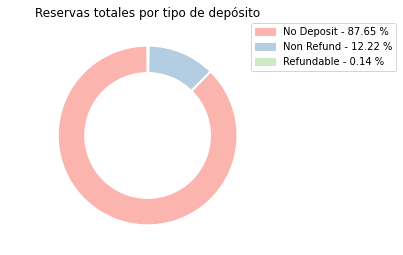

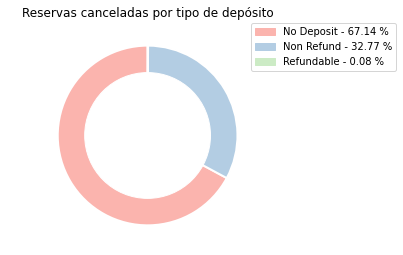

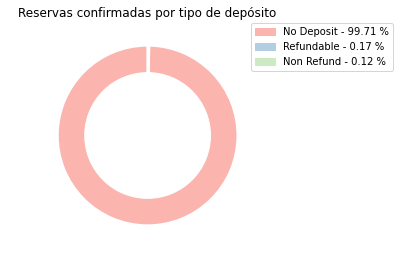

In [28]:
# Tipo de Depósito
plot_donut(bookings_df, 'deposit_type', 'Reservas totales por tipo de depósito')
plot_donut(canceled_df, 'deposit_type', 'Reservas canceladas por tipo de depósito')
plot_donut(confirmed_df, 'deposit_type', 'Reservas confirmadas por tipo de depósito')